In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("branded-amazon-shoes-results.xls")#read in the data

In [3]:
df.head()#visualize first five rows

,item_name,price,real_price,rating,reviews,brand_name
0,adidas Women's Cloudfoam Pure Running Shoe,Not Found,Not Found,4.6 out of 5 stars,"70,519",adidas
1,adidas Men's Lite Racer Adapt 4.0 Running Shoe,$44.50,$70.00,4.5 out of 5 stars,"15,314",adidas
2,adidas Unisex-Child Lite Racer Adapt 5.0 Runni...,$44.95,$60.00,4.5 out of 5 stars,483,adidas
3,adidas Men's Racer Tr21 Running Shoe,$46.95,$75.00,4.5 out of 5 stars,"7,694",adidas
4,adidas Men's Terrex Ax4 Sneaker,Not Found,Not Found,4.3 out of 5 stars,"2,148",adidas


In [4]:
df.shape

(3984, 6)

> 3984 entries and 6 features

In [5]:
for i in df.columns:
    print(i, " : " ,len(df[df[i] == "Not Found"]))
    #Not Found is used to represent missing values. 
    #Searching for number of missing values

item_name  :  0
price  :  300
real_price  :  1630
rating  :  82
reviews  :  82
brand_name  :  0


> real_price missing over half of it's total values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_name   3984 non-null   object
 1   price       3984 non-null   object
 2   real_price  3984 non-null   object
 3   rating      3984 non-null   object
 4   reviews     3984 non-null   object
 5   brand_name  3984 non-null   object
dtypes: object(6)
memory usage: 186.9+ KB


> Wrong datatypes of object can be seen for columns that should be floats

#### Problems
* drop real_price column because <i>almost half missing</i>
* remove $, ","
* replace 'Not Found' with null type
* extract rating 
* convert datatypes

### clean up

In [7]:
df_clean = df.copy()#Make a copy to avoid making changes to original

In [8]:
#find places where price is missing and real price is populated
df_clean[(df_clean.price == "Not Found") & (df_clean.price != "Not Found")].reset_index(drop=True)

,item_name,price,real_price,rating,reviews,brand_name


> None, so just drop real_price

In [9]:
#try to drop rows where real price and price = Not Found
df_clean = df_clean[(df.price != "Not Found") & (df_clean.price != "Not Found")].reset_index(drop=True)

In [10]:
df_clean.drop("real_price", axis=1, inplace=True)#dropping real price due to too many missing values
df_clean.head()

,item_name,price,rating,reviews,brand_name
0,adidas Men's Lite Racer Adapt 4.0 Running Shoe,$44.50,4.5 out of 5 stars,"15,314",adidas
1,adidas Unisex-Child Lite Racer Adapt 5.0 Runni...,$44.95,4.5 out of 5 stars,483,adidas
2,adidas Men's Racer Tr21 Running Shoe,$46.95,4.5 out of 5 stars,"7,694",adidas
3,adidas Men's Gamecourt 2 Tennis Shoe,$56.99,4.5 out of 5 stars,971,adidas
4,adidas Men's Tech Response 2.0 Golf Shoe,$49.99,4.6 out of 5 stars,"10,007",adidas


In [11]:
#remove $ from price while converting to float type
df_clean["price"] = df_clean["price"].apply(lambda x: float(x[1:]) if x[0]=="$" else np.nan)
df_clean["price"].head()

0    44.50
1    44.95
2    46.95
3    56.99
4    49.99
Name: price, dtype: float64

In [12]:
len(df_clean[df_clean.price.isnull()==True])# Places where pice column is missing data

0

In [13]:
#remove commas from reviews to allow conversion to int
df_clean["reviews"] = df_clean["reviews"].apply(lambda review: int(review.replace(",","")) if review != "Not Found" else np.nan)
df_clean.head()

,item_name,price,rating,reviews,brand_name
0,adidas Men's Lite Racer Adapt 4.0 Running Shoe,44.50,4.5 out of 5 stars,15314.0,adidas
1,adidas Unisex-Child Lite Racer Adapt 5.0 Runni...,44.95,4.5 out of 5 stars,483.0,adidas
2,adidas Men's Racer Tr21 Running Shoe,46.95,4.5 out of 5 stars,7694.0,adidas
3,adidas Men's Gamecourt 2 Tennis Shoe,56.99,4.5 out of 5 stars,971.0,adidas
4,adidas Men's Tech Response 2.0 Golf Shoe,49.99,4.6 out of 5 stars,10007.0,adidas


In [14]:
len(df_clean[df_clean.reviews.isnull()==True])#places where reviews column is missing data

78

In [15]:
#extract rating and convert to float
df_clean["rating"] = df_clean["rating"].apply(lambda rate: float(rate.split(" ")[0]) if rate != "Not Found" else np.nan)

In [16]:
df_clean.head()

,item_name,price,rating,reviews,brand_name
0,adidas Men's Lite Racer Adapt 4.0 Running Shoe,44.50,4.5,15314.0,adidas
1,adidas Unisex-Child Lite Racer Adapt 5.0 Runni...,44.95,4.5,483.0,adidas
2,adidas Men's Racer Tr21 Running Shoe,46.95,4.5,7694.0,adidas
3,adidas Men's Gamecourt 2 Tennis Shoe,56.99,4.5,971.0,adidas
4,adidas Men's Tech Response 2.0 Golf Shoe,49.99,4.6,10007.0,adidas


In [17]:
len(df_clean[df_clean.rating.isnull()==True])

78

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_name   3684 non-null   object 
 1   price       3684 non-null   float64
 2   rating      3606 non-null   float64
 3   reviews     3606 non-null   float64
 4   brand_name  3684 non-null   object 
dtypes: float64(3), object(2)
memory usage: 144.0+ KB


In [19]:
df_clean.dropna(inplace = True)#drop missing values

In [20]:
df_clean['reviews'] = df_clean.reviews.astype(int)

In [21]:
df_clean

,item_name,price,rating,reviews,brand_name
0,adidas Men's Lite Racer Adapt 4.0 Running Shoe,44.50,4.5,15314,adidas
1,adidas Unisex-Child Lite Racer Adapt 5.0 Runni...,44.95,4.5,483,adidas
2,adidas Men's Racer Tr21 Running Shoe,46.95,4.5,7694,adidas
3,adidas Men's Gamecourt 2 Tennis Shoe,56.99,4.5,971,adidas
4,adidas Men's Tech Response 2.0 Golf Shoe,49.99,4.6,10007,adidas
...,...,...,...,...,...
3679,Salomon Women's Alphacross 4 Gore-tex Trail Ru...,81.97,3.0,2,Salomon
3680,Salomon Men's Quest Rove Gore-tex Trail Runnin...,150.59,4.6,21,Salomon
3681,Salomon Men's Supercross 3 Trail Running Shoes,108.90,4.6,135,Salomon
3682,Salomon XA PRO 3D Trail Running Shoes for Men,149.95,4.5,335,Salomon


In [22]:
#calculate weighted reviews because reviews and rating alone will give innacurate analysis
df_clean["weighted_review"] = (df_clean["rating"] * df_clean["reviews"]) / np.min((df_clean["rating"] * df_clean["reviews"]))

In [23]:
df_clean["weighted_review"]

0       68913.0
1        2173.5
2       34623.0
3        4369.5
4       46032.2
         ...   
3679        6.0
3680       96.6
3681      621.0
3682     1507.5
3683      310.8
Name: weighted_review, Length: 3606, dtype: float64

In [24]:
df_clean.sort_values(by="weighted_review", ascending=False)
#check weighted reviews
#looks good from cursory glance

,item_name,price,rating,reviews,brand_name,weighted_review
2017,Crocs Unisex-Adult Classic Clogs,26.65,4.8,532063,Crocs,2553902.4
2019,Crocs Unisex-Child Classic Clog,34.99,4.8,118999,Crocs,571195.2
416,Hey Dude Women's Wendy L,30.64,4.7,111484,Hey Dude,523974.8
917,Saucony Women's Performance Heel Tab Athletic ...,12.61,4.8,100659,Saucony,483163.2
2012,Crocs unisex-adult Classic Lined Clog,32.66,4.8,92661,Crocs,444772.8
...,...,...,...,...,...,...
1508,Columbia Men's Bahama Vent Loco Iii Boat Shoe,74.95,3.0,1,Columbia,3.0
3311,"Capezio Women's Cassie Jr. Character Shoe, Bla...",38.90,3.0,1,Capezio,3.0
3105,"Dockers Footwear Men's Oxford, Black, 7",50.61,1.0,1,Dockers,1.0
2130,K-Swiss Women's Speed Trac Tennis Shoe,88.00,1.0,1,K-Swiss,1.0


In [25]:
df_clean.drop_duplicates(inplace = True)#remove duplicate data

In [26]:
df_clean.reset_index(drop = True, inplace=True)

In [27]:
df_clean

,item_name,price,rating,reviews,brand_name,weighted_review
0,adidas Men's Lite Racer Adapt 4.0 Running Shoe,44.50,4.5,15314,adidas,68913.0
1,adidas Unisex-Child Lite Racer Adapt 5.0 Runni...,44.95,4.5,483,adidas,2173.5
2,adidas Men's Racer Tr21 Running Shoe,46.95,4.5,7694,adidas,34623.0
3,adidas Men's Gamecourt 2 Tennis Shoe,56.99,4.5,971,adidas,4369.5
4,adidas Men's Tech Response 2.0 Golf Shoe,49.99,4.6,10007,adidas,46032.2
...,...,...,...,...,...,...
3599,Salomon Women's Alphacross 4 Gore-tex Trail Ru...,81.97,3.0,2,Salomon,6.0
3600,Salomon Men's Quest Rove Gore-tex Trail Runnin...,150.59,4.6,21,Salomon,96.6
3601,Salomon Men's Supercross 3 Trail Running Shoes,108.90,4.6,135,Salomon,621.0
3602,Salomon XA PRO 3D Trail Running Shoes for Men,149.95,4.5,335,Salomon,1507.5


In [28]:
df_sorted = df_clean.sort_values(by = "weighted_review", axis=0, ascending = False).reset_index(drop=True)

In [29]:
df_sorted

,item_name,price,rating,reviews,brand_name,weighted_review
0,Crocs Unisex-Adult Classic Clogs,26.65,4.8,532063,Crocs,2553902.4
1,Crocs Unisex-Child Classic Clog,34.99,4.8,118999,Crocs,571195.2
2,Hey Dude Women's Wendy L,30.64,4.7,111484,Hey Dude,523974.8
3,Saucony Women's Performance Heel Tab Athletic ...,12.61,4.8,100659,Saucony,483163.2
4,Crocs unisex-adult Classic Lined Clog,32.66,4.8,92661,Crocs,444772.8
...,...,...,...,...,...,...
3599,Columbia Men's Bahama Vent Loco Iii Boat Shoe,74.95,3.0,1,Columbia,3.0
3600,"Capezio Women's Cassie Jr. Character Shoe, Bla...",38.90,3.0,1,Capezio,3.0
3601,"Dockers Footwear Men's Oxford, Black, 7",50.61,1.0,1,Dockers,1.0
3602,Salomon Women's Speedcross 5 Gore-tex Trail Ru...,149.95,1.0,1,Salomon,1.0


In [30]:
df_sorted.describe()#statistical description of data

,price,rating,reviews,weighted_review
count,3604.000000,3604.000000,3604.000000,3.604000e+03
mean,61.998821,4.376776,2826.529134,1.274188e+04
std,34.314400,0.309703,11463.461565,5.409836e+04
min,6.680000,1.000000,1.000000,1.000000e+00
25%,39.990000,4.200000,62.000000,2.663250e+02
50%,51.985000,4.400000,412.000000,1.804600e+03
75%,74.000000,4.600000,1957.000000,8.359200e+03
max,358.510000,5.000000,532063.000000,2.553902e+06


In [31]:
df_sorted.to_csv("cleaned_up.csv", index=False)

### insights from statistical data

* max is far from 3rd quartile in weighted_review and reviews this is a clear sign of outliers in the data
* min also?
* compare median and mean

In [32]:
print("median: ", np.median(df_clean.weighted_review))
print("mean: ", np.mean(df_clean.weighted_review))

median:  1804.6
mean:  12741.876165371768


In [33]:
#Eliminate outliers with the use of the inter quartile range
#IQR = Q3 – Q1
#Upper fence = Q3 + (1.5 * IQR)
#Lower fence = Q1 – (1.5 * IQR)

Q3 = df_sorted.describe()["weighted_review"]["75%"]
Q1 = df_sorted.describe()["weighted_review"]["25%"]
IQR = Q3 - Q1
UF = Q1 + (1.5 * IQR)
LF = Q1 - (1.5 * IQR)

df_analyze = df_sorted[(df_sorted.weighted_review >= LF ) & (df_sorted.weighted_review <= UF )].reset_index(drop=True)

In [34]:
df_analyze.head()

,item_name,price,rating,reviews,brand_name,weighted_review
0,Brooks Men's Addiction Walker 2 Walking Shoe -...,129.95,4.4,2816,Brooks,12390.4
1,Rockport Men's Springboro Rocklake Sandal,51.89,4.6,2688,Rockport,12364.8
2,Clarks Women's Merliah Karli Sandal,46.99,4.3,2855,Clarks,12276.5
3,Hey Dude Women's Wendy Rise Peacock | Women’s ...,41.71,4.7,2595,Hey Dude,12196.5
4,Rockport Women's Ramona Flat Sandal,37.89,4.4,2755,Rockport,12122.0


In [35]:
df_analyze.shape

(2872, 6)

## EDA

#### Questions
* Relationship between the brands and price,average ratings and weighted review

In [36]:
#what is the relationship between price and brand
#First, see number of brands available
print(len(df_analyze["brand_name"].value_counts()), " brands available")

40  brands available


In [37]:
print(df_analyze["brand_name"].value_counts())

JBU by Jambu          92
Easy Spirit           90
Lugz                  90
WHITE MOUNTAIN        89
Columbia              89
Steve Madden          88
Capezio               87
Ryka                  87
OLUKAI                86
Cole Haan             84
Saucony               84
TOMS                  81
LifeStride            81
ALTRA                 80
PUMA                  78
Sperry                76
Rockport              76
Salomon               75
K-Swiss               75
Roxy                  74
Merrell               70
Nike                  70
Dockers               70
Brooks                69
FootJoy               69
Dr. Scholl's Shoes    69
Bruno Marc            67
Reebok                67
Hey Dude              67
Clarks                64
ASICS                 63
adidas Originals      63
Under Armour          63
DREAM PAIRS           60
adidas                60
Amazon Essentials     58
New Balance           57
Keds                  55
Crocs                 38
Skechers              11


In [38]:
price_weight_ave = df_analyze[["brand_name","price","weighted_review"]].groupby("brand_name").mean()

In [39]:
price_weight_ave.sort_values("price", ascending=False)[:10]["price"]

brand_name
ALTRA        128.857500
FootJoy      124.560725
Brooks       120.390580
Salomon      107.104667
Cole Haan     99.152262
OLUKAI        97.234884
Nike          80.241429
Saucony       74.874881
Columbia      73.666067
K-Swiss       73.351867
Name: price, dtype: float64

> average price of shoes in decscending order meaning these are the 10 most expensive shoe brands

In [40]:
price_weight_ave.sort_values("weighted_review", ascending=False)[:10]["weighted_review"]

brand_name
Skechers       4625.509091
adidas         3797.416667
DREAM PAIRS    3682.536667
Bruno Marc     3586.420896
Merrell        3487.514286
ASICS          3429.679365
Crocs          3256.118421
Clarks         3078.039062
Rockport       3042.859211
Reebok         2974.216418
Name: weighted_review, dtype: float64

> average weighted rating of shoes in decscending order meaning these are the 10 most highly rated shoes on amazon

In [41]:
ave_rate = df_analyze[["brand_name","rating"]].groupby("brand_name").mean().sort_values("rating", ascending=False)[:10]
ave_rate[:10]

,rating
brand_name,
Hey Dude,4.634328
Under Armour,4.530159
Brooks,4.497101
Crocs,4.492105
Skechers,4.481818
adidas,4.475000
Sperry,4.473684
PUMA,4.469231
ASICS,4.466667


> First 10 most highly rated shoes, but without number of reviews in consideration

In [42]:
weighted_brand = df_analyze[["brand_name","price","weighted_review"]].groupby("brand_name").mean().sort_values("weighted_review", ascending=False)
weighted_brand[:10]

,price,weighted_review
brand_name,,
Skechers,42.500000,4625.509091
adidas,58.588000,3797.416667
DREAM PAIRS,32.735667,3682.536667
Bruno Marc,32.642388,3586.420896
Merrell,72.978000,3487.514286
ASICS,73.347302,3429.679365
Crocs,37.842632,3256.118421
Clarks,50.167187,3078.039062
Rockport,65.265789,3042.859211


> First 10 most highly rated shoes, but with the number of reviews put into consideration

In [43]:
#Most popular brands based on number of reviews
popular = df_analyze[["brand_name","reviews"]].groupby("brand_name").mean().sort_values(by="reviews", ascending = False)
print("10 most popular shoe brands: ")
for i in popular.index[:10]:
    print (i)


10 most popular shoe brands: 
Skechers
DREAM PAIRS
adidas
Bruno Marc
Merrell
ASICS
Crocs
Clarks
Rockport
Reebok


### Visualization

### Questions
* relationship between price and weighted review(scatter plot?)
* relationship between price and reviews(scatter plot?)
* box plot and histograms (Need to know lowest and highest and see distributions)
* Relationship between the brands and price,average ratings and weighted review

### Single

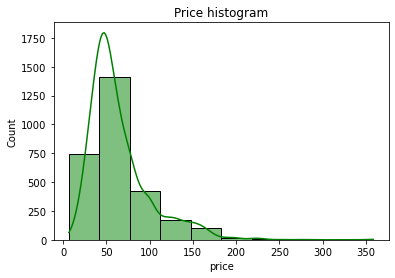

In [44]:
sns.histplot(data = df_analyze, x = "price", bins=10, color = "green", element="bars", kde=True)
plt.title("Price histogram");

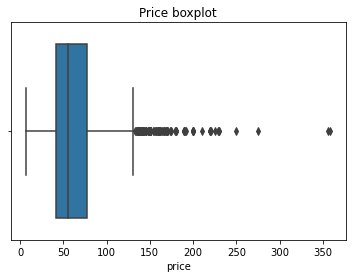

In [45]:
sns.boxplot(data = df_analyze, x = "price")
plt.title("Price boxplot");

> price is clearly skewed, with the average price at 50 dollars and a shoe being as high as over 200 dollars

* <b>Note :</b>should check the brands or categories that are above a 100 dollars, might be a connection

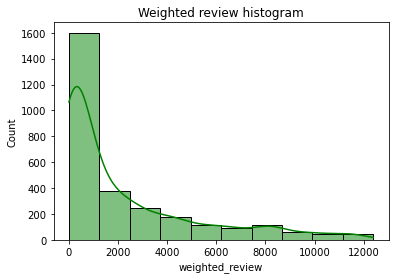

In [46]:
sns.histplot(data = df_analyze, x = "weighted_review", bins=10, color = "green", element="bars", kde=True)
plt.title("Weighted review histogram");

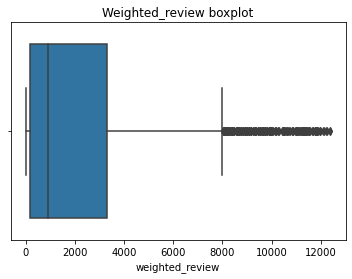

In [47]:
sns.boxplot(data = df_analyze, x = "weighted_review")
plt.title("Weighted_review boxplot");

> clearly skewed also

* <b>Note :</b>should check the brands or categories of outliers also ( > than 5500)

### Relationships

#### Price & Weighted review
> are there cheap shoes with high weights?

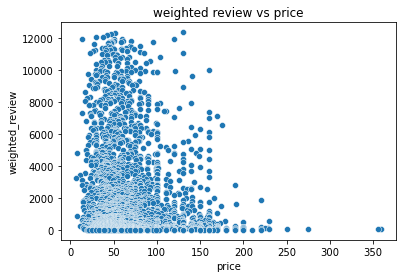

In [48]:
sns.scatterplot(data = df_analyze, x = "price", y = "weighted_review")
plt.title("weighted review vs price");

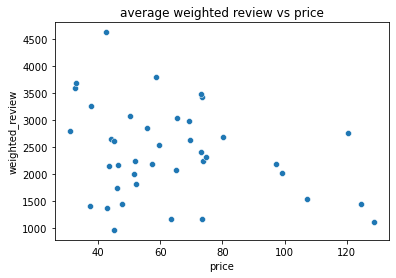

In [49]:
sns.scatterplot(data = price_weight_ave, x = "price", y = "weighted_review");
plt.title("average weighted review vs price");


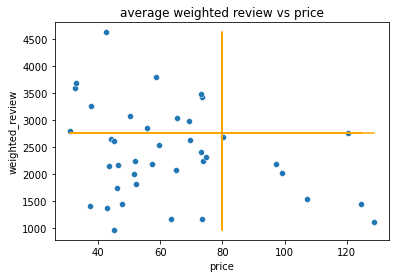

In [62]:
tot = len(price_weight_ave)
a = np.median(price_weight_ave.price)
b = np.median(price_weight_ave.weighted_review)
x_y = [80 for i in range(0,tot)]
y_x = [(2500+3000)/2 for i in range(0,tot)]
y = price_weight_ave.weighted_review
x = price_weight_ave.price
sns.scatterplot(data = price_weight_ave, x = "price", y = "weighted_review");
plt.title("average weighted review vs price");
plt.plot(x_y, y, color = 'orange')
plt.plot(x, y_x, color = 'orange')
plt.savefig('a_w_r.png')

> Plot seems to show an inverse relationship between price and weighted review. Could mean that cheaper shoes do get more appreciation by consumers. Also, if separated into four segments, the top right conner depicting high price and high weighted review is unpopulated, also suggesting that cheaper brands should be gotten.

In [51]:
df_analyze.head()

,item_name,price,rating,reviews,brand_name,weighted_review
0,Brooks Men's Addiction Walker 2 Walking Shoe -...,129.95,4.4,2816,Brooks,12390.4
1,Rockport Men's Springboro Rocklake Sandal,51.89,4.6,2688,Rockport,12364.8
2,Clarks Women's Merliah Karli Sandal,46.99,4.3,2855,Clarks,12276.5
3,Hey Dude Women's Wendy Rise Peacock | Women’s ...,41.71,4.7,2595,Hey Dude,12196.5
4,Rockport Women's Ramona Flat Sandal,37.89,4.4,2755,Rockport,12122.0


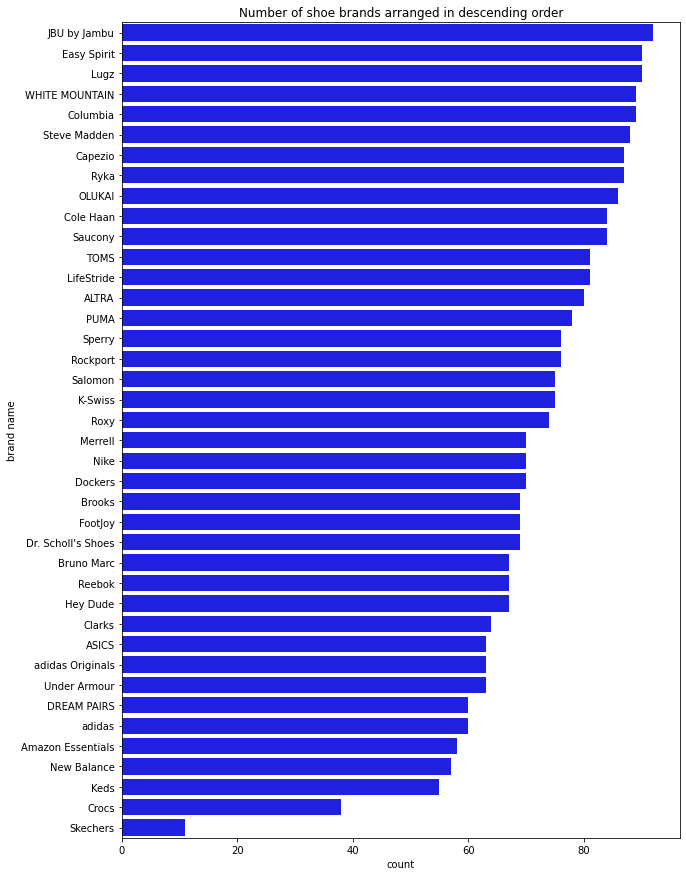

In [52]:
plt.figure(figsize=(10,15))
sns.barplot(x = df_analyze.brand_name.value_counts().values, y = df_analyze.brand_name.value_counts().index, color = "blue");
plt.title("Number of shoe brands arranged in descending order")
plt.xlabel("count")
plt.ylabel("brand name");

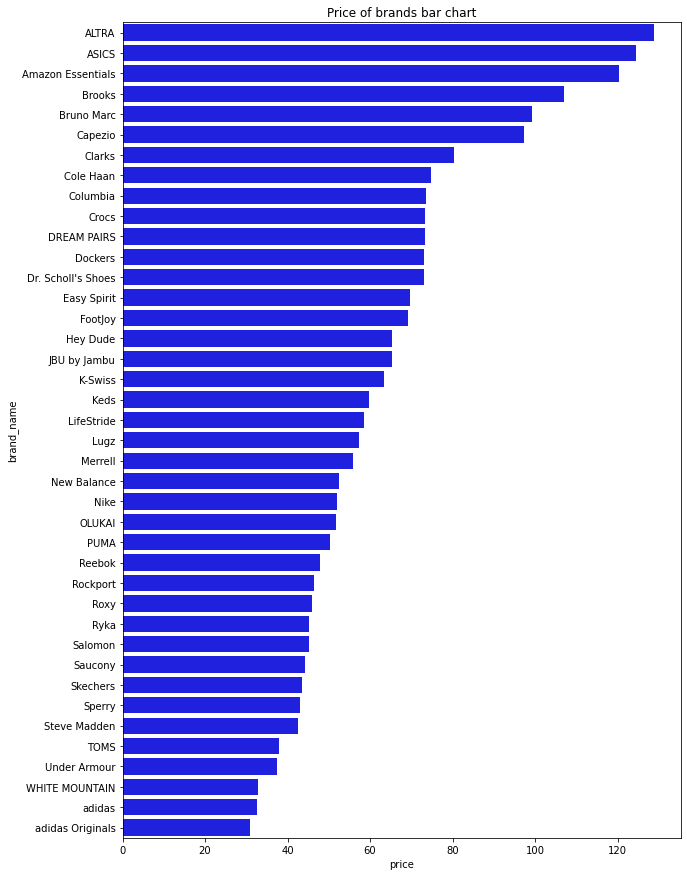

In [53]:
#Most expensive brands
plt.figure(figsize=(10,15))
sns.barplot(x = price_weight_ave.sort_values(by="price", ascending = False).price, y = price_weight_ave.index, color = "blue", estimator = np.mean, order =price_weight_ave.index );
plt.title("Price of brands bar chart");

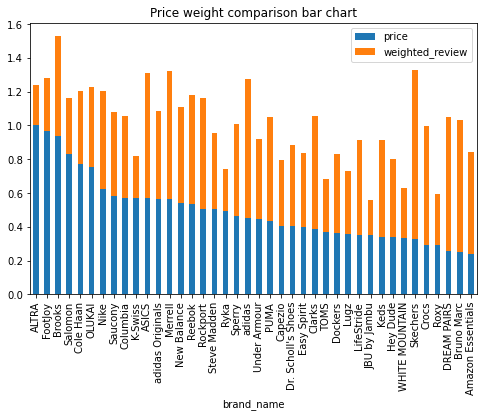

In [63]:
normalized = price_weight_ave.sort_values(by = "price", ascending = False).copy();
normalized["weighted_review"] = normalized["weighted_review"]/np.max(normalized["weighted_review"]);
normalized["price"] = normalized["price"]/np.max(normalized["price"]);
normalized.plot(kind="bar", stacked=True, figsize=(8,5));
plt.title("Price weight comparison bar chart");
plt.savefig('p_w_compare.png')

> There is no clear relationship between price and the shoe rating, using the graph above we can compare how the price of a brand relates to it's popularity, therefore for example, an expensive brand which seems to be liked a lot is the brooks and conversely a cheap one that seems to be quite popular is the skechers brand.

In [55]:
#Get 5 most popular brands
pop = list(popular.index[:5])

In [56]:
row_num = []
for j,k in zip(df_analyze["brand_name"], range(0,len(df_analyze))):
    if j in pop:
        row_num.append(k)

In [57]:
pop_tot = df_analyze.loc[row_num]

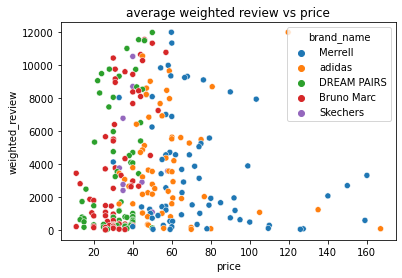

In [60]:
sns.scatterplot(data = pop_tot, x = "price", y = "weighted_review", hue = "brand_name");
plt.title("average weighted review vs price");
plt.savefig('a_w_r_p.png');

> For the five most popular shoes, Bruno Marc and Dream pairs dominate the left part of the graph showing that they are of lower price but still popular and well rated while Merrell and adidas populate the right hand side showing they are the more expensive of the top five. Skechers finds its way inbetween these groups and so is of average expense in the most popular shoes.

# Summary of findings

* There are cheap and top 5 popular brands which would be quite lucrative to have in stock. some of these are Bruno Marc and Dream pairs.
* There might be an inverse relationship between price and weighted review. Could mean that cheaper shoes do get more appreciation by consumers.
* Using the graph titled "Price weight comparison bar chart" a shopowner can leverage between the funds available and the popularity of a shoe brand to make decisions on what kind of brand is trending and should be kept in stock.